
# K-vecinos más cercanos (KNN)
## Datos de clientes bancarios: 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


clientes = pd.read_csv("Movie_Ratings.csv")
clientes

,peliculas,Patrick C,Heather,Bryan,Patrick T,Thomas,aaron,vanessa,greg,brian,...,Zak,Matt,Chris.1,Josh,Amy,Valerie,Gary,Stephen,Jessica,Jeff
0,Alien,NaN,NaN,2.0,NaN,5.0,4.0,NaN,NaN,4.0,...,NaN,NaN,4.0,3.0,NaN,NaN,2.0,5.0,NaN,4.0
1,Avatar,4.0,5.0,5.0,4.0,2.0,NaN,4.0,3.0,NaN,...,5.0,NaN,NaN,4.0,3.0,2.0,1.0,4.0,NaN,4.0
2,Blade Runner,5.0,NaN,NaN,NaN,5.0,4.0,NaN,1.0,5.0,...,NaN,NaN,3.0,NaN,3.0,3.0,1.0,NaN,NaN,5.0
3,Braveheart,4.0,NaN,5.0,NaN,4.0,4.0,3.0,4.0,4.0,...,5.0,NaN,4.0,NaN,3.0,4.0,5.0,5.0,NaN,4.0
4,Dodgeball,5.0,4.0,3.0,2.0,4.0,NaN,4.0,5.0,3.0,...,3.0,NaN,3.0,NaN,4.0,3.0,4.0,3.0,NaN,3.0
5,Forest Gump,4.0,5.0,4.0,3.0,3.0,NaN,4.0,5.0,5.0,...,5.0,4.0,5.0,4.0,4.0,5.0,4.0,1.0,4.0,4.0
6,Gladiator,NaN,5.0,5.0,NaN,4.0,4.0,4.0,5.0,5.0,...,5.0,NaN,3.0,4.0,NaN,3.0,3.0,4.0,NaN,4.0
7,Jaws,NaN,5.0,4.0,NaN,4.0,NaN,2.0,3.0,3.0,...,NaN,NaN,5.0,5.0,3.0,2.0,4.0,2.0,3.0,5.0
8,Kazaam,2.0,NaN,3.0,5.0,2.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0
9,Lord of the Rings,4.0,4.0,3.0,2.0,NaN,5.0,2.0,3.0,5.0,...,4.0,1.0,4.0,NaN,NaN,5.0,3.0,5.0,3.0,3.0


In [6]:
X = clientes.iloc[:, 1:]  # Excluye la columna "peliculas"
y = clientes["peliculas"]

In [7]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un imputador para llenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Escalar las características para normalizarlas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=1)  # Puedes ajustar el número de vecinos

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir las películas en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)

# Supongamos que tienes una fila de datos de prueba sin el nombre de la película
nueva_data = X_test[0:19]  # Esto toma la primera fila del conjunto de prueba
print(nueva_data)
# Escala la nueva_data de prueba
nueva_data = scaler.transform(nueva_data)

# Usa el modelo KNN para predecir la película
nombre_predicho = knn.predict(nueva_data)

print("Película predicha:", nombre_predicho)


Precisión del modelo KNN: 0.0
[[-1.61868930e+00  0.00000000e+00 -4.17006445e-01  1.75411604e+00
  -1.51716521e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.73601368e+00 -3.64027691e-16 -2.86038777e+00 -2.56284643e+00
  -1.33333333e+00 -4.03322756e+00 -1.66856319e+00 -2.20843103e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.10226694e+00
  -2.17441931e+00 -1.76330477e+00  0.00000000e+00 -4.01869018e+00
  -3.53897115e+00]
 [ 2.49029123e-01 -5.68552327e+00 -1.20468529e+00  0.00000000e+00
   2.02288695e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -9.45168362e-01 -1.54299762e+00  0.00000000e+00  0.00000000e+00
  -2.33333333e+00 -6.79387629e-16  9.26979549e-02  0.00000000e+00
  -3.65148372e+00 -1.67718202e-01  0.00000000e+00 -1.74502515e+00
  -2.17441931e+00 -9.53137711e-01  0.00000000e+00 -2.57196172e+00
  -3.53897115e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.20468529e+00  0.00000000e+00
   1.06201565e+00  3.58057437e-01  0.00000000e+00  0.00000000e+00
  -4.974

# Fantasia , Terror , Misterio , Drama

# Gráfica: peliculas


# Preparación de los datos (Escalar)

In [8]:
datos = clientes[["edad", "fantasia", "terror", "misterio", "drama"]]
clase = clientes["likee"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)

KeyError: "None of [Index(['edad', 'fantasia', 'terror', 'misterio', 'drama'], dtype='object')] are in the [columns]"

# Creación del Modelo KNN
## Valor de K

In [ ]:
clasificador = KNeighborsClassifier(n_neighbors=2)

clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=2)

# Nuevo Solicitante (Clasificación)

Clase: [0]
Probabilidades por clase [[0.5 0.5]]
Al nuevo solicitante no le gustaría la película.


c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


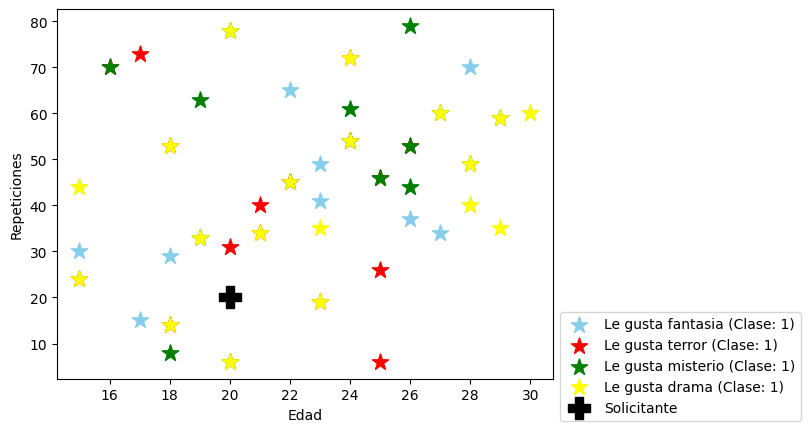

In [ ]:
edad = 20
fantasia = 0
terror = 0
misterio = 1
drama = 0

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, fantasia, terror, misterio, drama]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))


resultado = clasificador.predict(solicitante)

if resultado == 1:
    print("Al nuevo solicitante le gustaría la película.")
else:
    print("Al nuevo solicitante no le gustaría la película.")

#Código para graficar
plt.scatter(fantasia1["edad"], fantasia1["repeticiones"],
            marker="*", s=150, color="skyblue",
            label="Le gusta fantasia (Clase: 1)")

plt.scatter(terror1["edad"], terror1["repeticiones"],
            marker="*", s=150, color="red", 
            label="Le gusta terror (Clase: 1)")

plt.scatter(misterio1["edad"], misterio1["repeticiones"],
            marker="*", s=150, color="green", 
            label="Le gusta misterio (Clase: 1)")

plt.scatter(drama1["edad"], drama1["repeticiones"],
            marker="*", s=150, color="yellow",
            label="Le gusta drama (Clase: 1)")

plt.scatter(edad,edad, marker="P", s=250, color="black", label="Solicitante") 
plt.ylabel("Repeticiones")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [ ]:
import pandas as pd

# Leer los datos del archivo CSV
datos = pd.read_csv("pelis.csv")

# Filtrar las filas desde 35 hasta 43
tabla = datos.iloc[10:22]

# Seleccionar las columnas relevantes
columnas_relevantes = ["fantasia", "terror", "misterio", "drama"]

# Cambiar los valores 1 y 0 a "Sí" y "No"
tabla[columnas_relevantes] = tabla[columnas_relevantes].replace({1: "Sí", 0: "No"})

# Mostrar la tabla
print(tabla)


    edad  repeticiones fantasia terror misterio drama  likee
10    18             8       Sí     No       Sí    No      0
11    19            63       Sí     No       Sí    No      1
12    19            33       Sí     No       Sí    Sí      1
13    20            78       Sí     No       Sí    Sí      1
14    20            31       Sí     Sí       No    No      1
15    20             6       No     No       Sí    Sí      1
16    21            34       No     Sí       No    Sí      1
17    21            40       No     Sí       No    No      0
18    22            65       Sí     No       No    No      1
19    22            45       Sí     Sí       Sí    Sí      1
20    23            35       No     No       No    Sí      0
21    23            49       Sí     No       No    No      1


C:\Users\Bartolomeo\AppData\Local\Temp\ipykernel_15916\257936828.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[columnas_relevantes] = tabla[columnas_relevantes].replace({1: "Sí", 0: "No"})
